In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import json
import sys
sys.path.append('..')
from importlib import reload
import utils
import stats
from matplotlib import pyplot as plt
reload(stats)

CONF_DIR = Path('../conf/').resolve()
DATA_DIR = Path('../data/').resolve()
ATTACK_NAMES = utils.get_attack_names(CONF_DIR)

[0.204867 0.257655 0.347683 0.374899 0.542716 0.577483]
[0.151412 0.197689 0.214505 0.317283]
[0.272061 0.415701 0.538308 0.577782 0.801734 0.824618 0.825042]
[0.10759  0.218577 0.331141 0.363618 0.438773 0.442917]


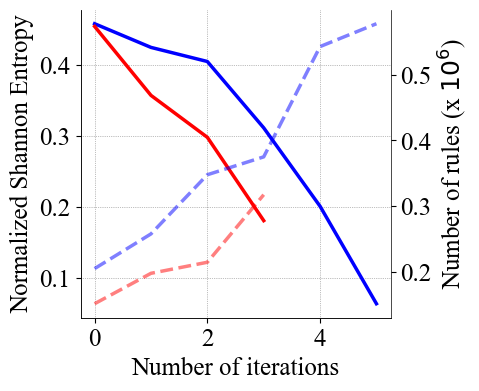

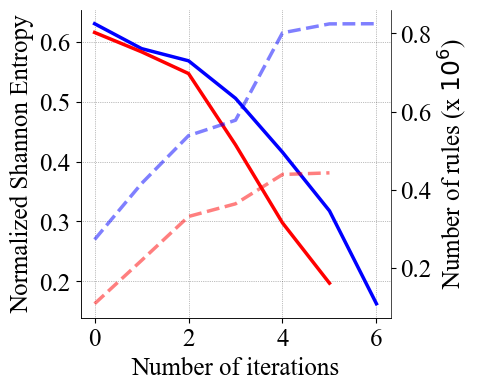

In [6]:
reload(stats)

for adblocker in ['ublock', 'adguard']:
    fig, ax = plt.subplots(figsize=(4, 4))
    ax2 = ax.twinx()
    colors = ['b', 'r', 'g', 'orange']
    i = 0
    for attack_name in ATTACK_NAMES:
        
        if attack_name not in ['iframe-observer-attack', 'lazy-image-loading-attack']:
            continue
        
        fp = DATA_DIR / "iterative_robustness" / adblocker / attack_name / "filterlist"/ "general"
        
        if not fp.exists():
            continue
        
        stats.iterative_robustness_stats(fp, ax, ax2, colors[i], attack_name)
        # stats.iterative_robustness_stats(fp, ax, ax2, colors[i], attack_name, what='n_unique_users')
        
        i+=1
    
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Normalized Shannon Entropy')
    # ax.legend( loc="lower right")
    ax2.grid(None)
    ax2.set_ylabel('Number of rules (x $10^6$)')
    
    # make the spine for the second y-axis visible
    ax2.spines['right'].set_visible(True)
    
    fig.savefig("figures/iterative_robustness_{}.pdf".format(adblocker), bbox_inches='tight')